In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from networkx.drawing.nx_pydot import write_dot
import graphviz
from IPython.display import display_png

In [ ]:
#Problèmes des 7 ponts de Koenigsberg
G=nx.MultiGraph()

#Les 4 quartiers de la ville...
G.add_node(1)  ## Quartier 1
G.add_node(2)  ## Quartier 2
G.add_node(3)  ## Quartier 3
G.add_node(4)  ## Quartier 4

## ...sont reliés entre eux par 7 ponts :
G.add_edge(1,3,color='r',weight=1)  ## Pont 1
G.add_edge(1,3,color='r',weight=1)  ## Pont 2
G.add_edge(1,4,color='r',weight=1)  ## Pont 3
G.add_edge(3,4,color='r',weight=1)  ## Pont 4
G.add_edge(1,2,color='r',weight=1)  ## Pont 5
G.add_edge(1,2,color='r',weight=1)  ## Pont 6
G.add_edge(2,4,color='r',weight=1)  ##Pont 7

colors = nx.get_edge_attributes(G,'color').values()
weights = nx.get_edge_attributes(G,'weight').values()

names = {1:"Altstadt",2:"Stadt-Wiesen",3:"Kneiphof",4:"Vorstadt"}
Koenigsberg =nx.relabel_nodes(G,names)

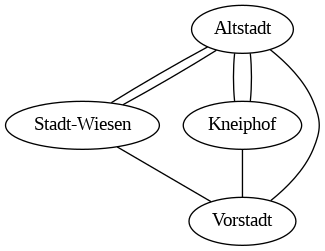

In [ ]:
path = 'koenigsberg_test.dot'
write_dot(Koenigsberg, path)
display_png(graphviz.Source.from_file(path))

In [ ]:
#Peut-on traverser les 7 ponts de la ville en les empruntant seulement une seule fois?
nx.is_eulerian(G)

False

## Fonction Graphe Unitaire for two actions possibilities

In [3]:
import networkx as nx

def get_nodeMap(num_bet = 1, actions = ["p", "b"]):
      '''Renvoie graphe unitaire du jeu de poker'''
      G = nx.DiGraph()
      #edge_list = [("", "p"), ("p", "pp"), ("p", "pb"), ("pb", "pbp"), ("pb", "pbb"), ("", "b"), ("b", "bp"), ("b", "bb")]

      edge_list = intoGraph(num_bet = num_bet, actions = actions, history = "", edge_list = [], round = 1)
      print("Edge List : {}".format(edge_list))

      G.add_edges_from(edge_list)
      #nx.draw_planar(G, with_labels=True)

      pos = nx.planar_layout(G)  # nx.spring_layout tente de positionner les nœuds de manière esthétique
      # Pour un arbre, tu pourrais préférer nx.planar_layout ou nx.spectral_layout pour d'autres arrangements

      # Dessin du graphe
      nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray')
      return G

def intoGraph(num_bet, actions, history, edge_list, round):
  assert len(history) <= 10
  next_history = history
  save_history = history
  sub_edge_list = edge_list
  bettingRound = round

  if is_terminal(history, num_bet, bettingRound):
    return sub_edge_list

  for action in actions:
    next_history = save_history + action

    if (next_history[-2:] == "bb") and (bettingRound != num_bet):
      #We have reached the end of a betting turn
      sub_edge_list.append((history, next_history))
      save_history = next_history
      next_history = next_history + "r"
      bettingRound += 1

    edge = (save_history, next_history)

    if edge not in sub_edge_list:
      sub_edge_list.append(edge)
      sub_edge_list = intoGraph(num_bet = num_bet, actions = actions, history = next_history, edge_list = sub_edge_list, round = bettingRound)
      next_history = sub_edge_list[-1][0]
      history = next_history
    else :
      save_history = ""

  return sub_edge_list

def is_terminal(history, num_bet, bettingRound):
  isTerminal = False
  isTerminal = isTerminal or (history[-2:] == "pp")
  isTerminal = isTerminal or (history[-2:] == "bp")
  isTerminal = isTerminal or ((history[-2:] == "bb") and (bettingRound == num_bet))

  return isTerminal

Edge List : [('', 'p'), ('p', 'pp'), ('p', 'pb'), ('pb', 'pbp'), ('pb', 'pbb'), ('pbb', 'pbbr'), ('pbbr', 'pbbrp'), ('pbbrp', 'pbbrpp'), ('pbbrp', 'pbbrpb'), ('pbbrpb', 'pbbrpbp'), ('pbbrpb', 'pbbrpbb'), ('pbbr', 'pbbrb'), ('pbbrb', 'pbbrbp'), ('pbbrb', 'pbbrbb'), ('', 'b'), ('b', 'bp'), ('b', 'bb'), ('bb', 'bbr'), ('bbr', 'bbrp'), ('bbrp', 'bbrpp'), ('bbrp', 'bbrpb'), ('bbrpb', 'bbrpbp'), ('bbrpb', 'bbrpbb'), ('bbr', 'bbrb'), ('bbrb', 'bbrbp'), ('bbrb', 'bbrbb')]


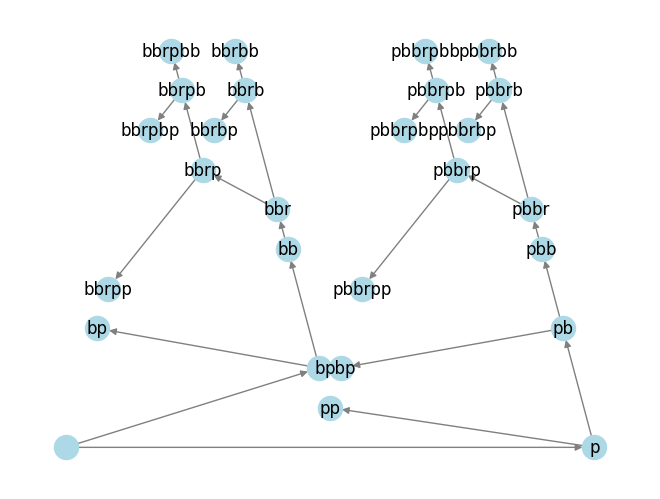

In [4]:
#Kuhn Poker
nodeMap = get_nodeMap(num_bet = 2)